In [1]:
import numpy as np
def get_pdf(points, bins):
    temp_counter = Counter(np.digitize(points, bins))
    temp_sum = sum(temp_counter.values())
    temp_ys = [temp_counter.get(i, 0) / temp_sum for i in range(1, len(bins))]

    return temp_ys

from collections import Counter 

entropy_data = np.load('../../data/derived/before/entropy_data.npy')
variance_data = np.load('../../data/derived/before/varaince_data.npy')

ent_bins = np.linspace(0, 2.1, 30 + 1)
var_bins = np.linspace(0, 18, 30 + 1)
ent_xs = [(ent_bins[i] + ent_bins[i + 1])/2 for i in range(len(ent_bins) - 1)]
var_xs = [(var_bins[i] + var_bins[i + 1])/2 for i in range(len(var_bins) - 1)]

ent_data_pdf = get_pdf(entropy_data, ent_bins)
var_data_pdf = get_pdf(variance_data, var_bins)

In [5]:
from glob import glob

In [6]:
import pandas as pd
files = glob('/data03/hotspot_new/before/find_gamma/result/*.csv')

In [14]:
vals = [pd.read_csv(file)['var_jsd'].mean() for file in files]

In [33]:
best_file = files[np.argmin(vals)]
splitted = best_file.split('.')
best_gamma = splitted[0][-1] + '.' + splitted[1]

In [35]:
min_idx = pd.read_csv(best_file)['var_jsd'].argmin()

In [36]:
entropies = np.load('/data03/hotspot_new/before/find_gamma/entropy/entropy_{}.npy'.format(best_gamma))[min_idx]
variances = np.load('/data03/hotspot_new/before/find_gamma/variance/variance_{}.npy'.format(best_gamma))[min_idx]

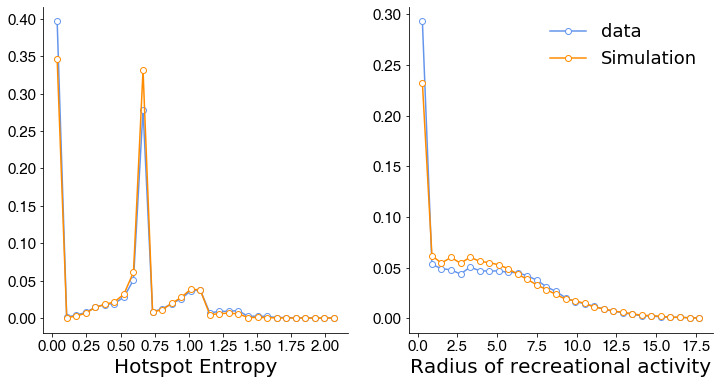

In [39]:
from scipy.spatial.distance import jensenshannon
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '../../assets/Helvetica.ttf'


ent_sim_pdf = get_pdf(entropies, ent_bins)
var_sim_pdf = get_pdf(variances, var_bins)
    
plt.rcParams['figure.figsize'] = (12.0, 6.0)

prop = font_manager.FontProperties(fname=font_path, size=22)
small_prop = font_manager.FontProperties(fname=font_path, size=18)
tiny_prop = font_manager.FontProperties(fname=font_path, size=15)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(ent_xs, ent_data_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='data')
ax1.plot(ent_xs, ent_sim_pdf, '-o', markerfacecolor='white', color='darkorange', label='Simulation')
ax1.set_xlabel('Hotspot Entropy', fontsize=20)

ax2.plot(var_xs, var_data_pdf, '-o', markerfacecolor='white', color='cornflowerblue', label='data')
ax2.plot(var_xs, var_sim_pdf, '-o', markerfacecolor='white', color='darkorange',  label='Simulation')
ax2.set_xlabel('Radius of recreational activity',fontsize=20)

plt.legend(fontsize=18, frameon=False)

for label in ax1.get_xticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax1.get_yticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax2.get_xticklabels():
    label.set_fontproperties(tiny_prop)
for label in ax2.get_yticklabels():
    label.set_fontproperties(tiny_prop)
ent_jsd = jensenshannon(ent_data_pdf, ent_sim_pdf)
var_jsd = jensenshannon(var_data_pdf , var_sim_pdf)


ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.savefig('figs/before_best_model.pdf', bbox_inches='tight')